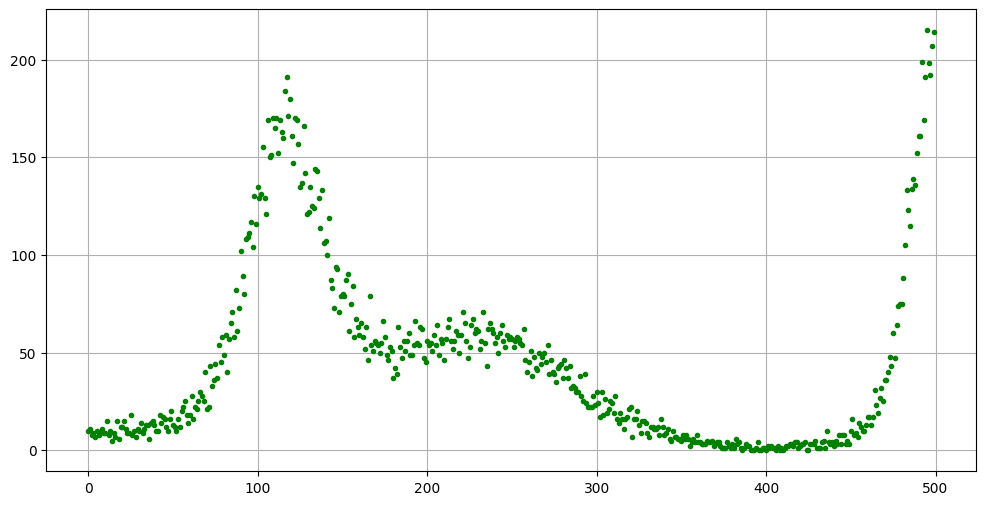

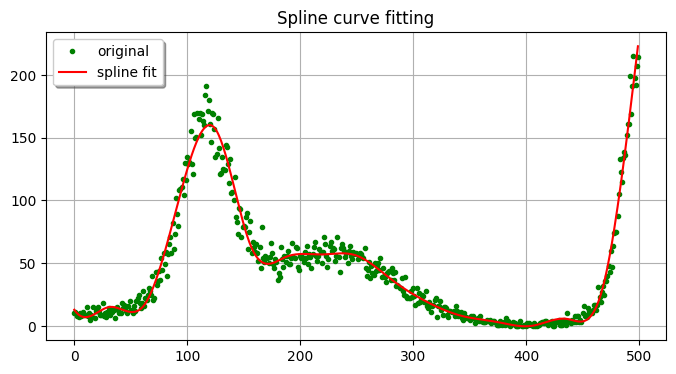

In [5]:
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('../data_sets/beta_test.csv')

df = df.to_numpy() 

y = []

for i,item in enumerate(df):
    y.append(item[1])

x=range(0,len(y))
plt.figure(figsize=(12, 6))
plt.plot(x, y, '.', c="g")
plt.grid()
plt.show()


knot_numbers = 15
x_new = np.linspace(0, 1, knot_numbers+2)[1:-1]
q_knots = np.quantile(x, x_new) 

t,c,k = interpolate.splrep(x, y, t=q_knots, s=1)
yfit = interpolate.BSpline(t,c,k)(x)

df = pd.DataFrame(yfit)

df.to_csv('../data_sets/FLU_HOSP_SPLINE.csv')

plt.figure(figsize=(8, 4))
plt.title("Spline curve fitting")
plt.plot(x, y, '.', c="g", label="original")
plt.plot(x, yfit, '-', c="r", label="spline fit")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 
 

